In [1]:
import json
from preprocessor.preprocessor_pytorch import Preprocessor
from model.model_pytorch import Model
from postprocessor.postprocessor import Postprocesser
from evaluator.evaluator_pytorch import Evaluator
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import tqdm
import os
import time


def set_seed(seed_value):
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    random.seed(seed_value)
    torch.manual_seed(seed_value)
set_seed(42)

with open('parameters.json', 'r') as file:
    params = json.load(file)


In [2]:
import os
current_dir = 'test'

os.makedirs(os.path.join(current_dir, 'plots'), exist_ok=True)
os.makedirs(os.path.join(current_dir, 'models'), exist_ok=True)
os.makedirs(os.path.join(current_dir, 'reports'), exist_ok=True)
os.makedirs(os.path.join(current_dir, 'data'), exist_ok=True)

In [3]:
preprocessor = Preprocessor(params)
X_train, y_train, X_val, y_val, X_test, y_test, train_dates, test_dates, X_newest, x_newest_date, SP500 = preprocessor.get_multiple_data()


[*********************100%***********************]  1 of 1 completed


c:\Users\e4903\Desktop\code\2023_hw\web\saferTrader\stock_project\revpred\lib\reversePrediction\preprocessor\preprocessor_pytorch.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trend'].iloc[i:i + trend_days] = 0 # up trend
c:\Users\e4903\Desktop\code\2023_hw\web\saferTrader\stock_project\revpred\lib\reversePrediction\preprocessor\preprocessor_pytorch.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trend'].iloc[i:i + trend_days] = 1 # down trend


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\e4903\Desktop\code\2023_hw\web\saferTrader\stock_project\revpred\lib\reversePrediction\preprocessor\preprocessor_pytorch.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trend'].iloc[i:i + trend_days] = 0 # up trend
c:\Users\e4903\Desktop\code\2023_hw\web\saferTrader\stock_project\revpred\lib\reversePrediction\preprocessor\preprocessor_pytorch.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trend'].iloc[i:i + trend_days] = 1 # down trend


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\e4903\Desktop\code\2023_hw\web\saferTrader\stock_project\revpred\lib\reversePrediction\preprocessor\preprocessor_pytorch.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trend'].iloc[i:i + trend_days] = 0 # up trend
c:\Users\e4903\Desktop\code\2023_hw\web\saferTrader\stock_project\revpred\lib\reversePrediction\preprocessor\preprocessor_pytorch.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trend'].iloc[i:i + trend_days] = 1 # down trend


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\e4903\Desktop\code\2023_hw\web\saferTrader\stock_project\revpred\lib\reversePrediction\preprocessor\preprocessor_pytorch.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trend'].iloc[i:i + trend_days] = 0 # up trend
c:\Users\e4903\Desktop\code\2023_hw\web\saferTrader\stock_project\revpred\lib\reversePrediction\preprocessor\preprocessor_pytorch.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trend'].iloc[i:i + trend_days] = 1 # down trend


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


100%|██████████| 108/108 [00:00<00:00, 19731.02it/s]

Training set shape: torch.Size([345, 32, 30])
Validation set shape: torch.Size([87, 32, 30])


In [4]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape, X_newest.shape

(torch.Size([345, 32, 30]),
 torch.Size([345, 8, 2]),
 torch.Size([87, 32, 30]),
 torch.Size([87, 8, 2]),
 torch.Size([184, 32, 30]),
 torch.Size([184, 8, 2]),
 torch.Size([1, 32, 30]))

In [5]:
SP500 = preprocessor.fetch_stock_data(preprocessor.params['stock_symbol'], preprocessor.params['start_date'], preprocessor.params['stop_date'])
for single_feature_params in preprocessor.params['features_params']:
    feature_type = single_feature_params["type"]
    SP500 = preprocessor.add_feature(SP500, feature_type, **single_feature_params)
_, issues_detected = preprocessor.add_data_cleaner(SP500,
    clean_type=preprocessor.params['data_cleaning']['clean_type'], strategy=preprocessor.params['data_cleaning']['strategy'])
# X_train_SP500, y_train_SP500, X_test, y_test, train_dates, test_dates = \
#     preprocessor.process_data(SP500, split_ratio=preprocessor.params['split_ratio'], target_col=preprocessor.params['target_col'],
#                             feature_cols=preprocessor.params['feature_cols'], look_back=preprocessor.params['look_back'],
#                             predict_steps=preprocessor.params['predict_steps'],
#                             train_slide_steps=preprocessor.params['train_slide_steps'],
#                             test_slide_steps=preprocessor.params['test_slide_steps'],
#                             reshape=preprocessor.params['model_params'][preprocessor.params['model_type']]['reshape'])
# X_newest, x_newest_date = preprocessor.create_x_newest_data(SP500, preprocessor.params['look_back'])

[*********************100%***********************]  1 of 1 completed


c:\Users\e4903\Desktop\code\2023_hw\web\saferTrader\stock_project\revpred\lib\reversePrediction\preprocessor\preprocessor_pytorch.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trend'].iloc[i:i + trend_days] = 0 # up trend
c:\Users\e4903\Desktop\code\2023_hw\web\saferTrader\stock_project\revpred\lib\reversePrediction\preprocessor\preprocessor_pytorch.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trend'].iloc[i:i + trend_days] = 1 # down trend


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
issues_detected

Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
Trend                 19
MACD_dif              17
MACD_dem              17
MACD_histogram        17
ROC                    5
StoK                   8
StoD                   8
CCI                   13
RSI                   14
VMA                   19
pctChange              1
13W Treasury Yield     7
5Y Treasury Yield      7
10Y Treasury Yield     7
30Y Treasury Yield     7
upperband             19
middleband            19
lowerband             19
ATR                   14
OBV                    0
Parabolic SAR          1
MOM                   10
Williams %R           13
Chaikin MF            19
dtype: int64

In [7]:
SP500

,Open,High,Low,Close,Adj Close,Volume,Trend,MACD_dif,MACD_dem,MACD_histogram,...,30Y Treasury Yield,upperband,middleband,lowerband,ATR,OBV,Parabolic SAR,MOM,Williams %R,Chaikin MF
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,1320.280029,1320.280029,1276.050049,1283.270020,1283.270020,1129400000,NaN,NaN,NaN,NaN,...,5.350,NaN,NaN,NaN,NaN,1.129400e+09,NaN,NaN,NaN,NaN
2001-01-03,1283.270020,1347.760010,1274.619995,1347.560059,1347.560059,1880700000,NaN,NaN,NaN,NaN,...,5.463,NaN,NaN,NaN,NaN,3.010100e+09,1347.760010,NaN,NaN,NaN
2001-01-04,1347.560059,1350.239990,1329.140015,1333.339966,1333.339966,2131000000,NaN,NaN,NaN,NaN,...,5.435,NaN,NaN,NaN,NaN,8.791000e+08,1274.619995,NaN,NaN,NaN
2001-01-05,1333.339966,1334.770020,1294.949951,1298.349976,1298.349976,1430800000,NaN,NaN,NaN,NaN,...,5.414,NaN,NaN,NaN,NaN,-5.517000e+08,1274.619995,NaN,NaN,NaN
2001-01-08,1298.349976,1298.349976,1276.290039,1295.859985,1295.859985,1115500000,NaN,NaN,NaN,NaN,...,5.408,NaN,NaN,NaN,NaN,-1.667200e+09,1276.132395,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1883780000,0.0,5.338616,9.207631,-3.869015,...,1.664,3730.336394,3680.314502,3630.292610,38.403235,1.251082e+12,3723.127240,34.959961,-25.337492,8.438681e+09
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3535460000,0.0,10.249831,9.416071,0.833760,...,1.669,3736.758430,3685.165002,3633.571575,38.335143,1.254617e+12,3636.479980,71.900146,-4.808045,8.336240e+09
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3393290000,0.0,11.046858,9.742228,1.304629,...,1.674,3736.197177,3690.435510,3644.673843,37.940494,1.251224e+12,3638.560581,79.550049,-23.696241,6.831743e+09


C:\Users\e4903\AppData\Local\Temp\ipykernel_24280\3417378608.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_values = SP500[:100][SP500['VMA'].isnull()]


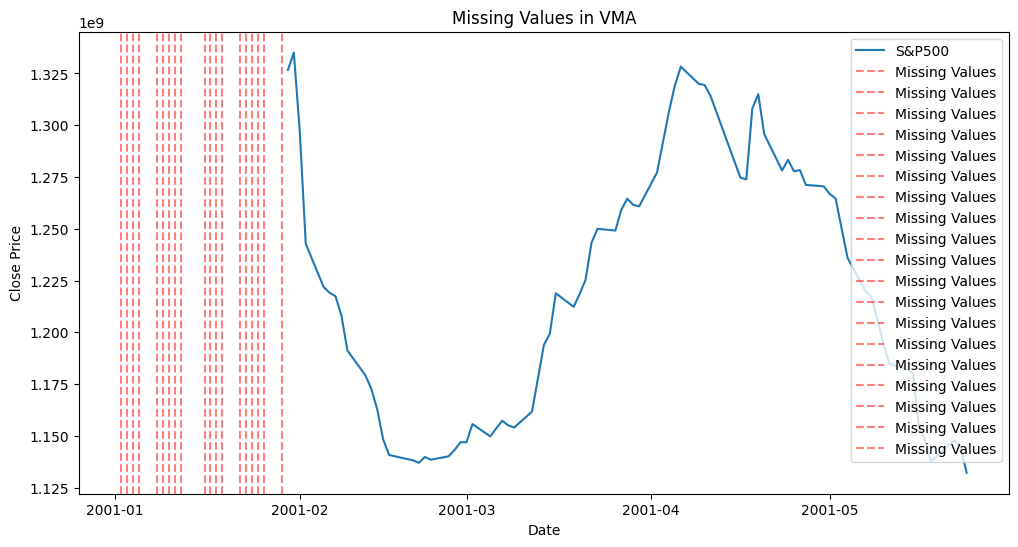

In [8]:

import matplotlib.pyplot as plt

# Plot the S&P500 data
plt.figure(figsize=(12, 6))
plt.plot(SP500.index[:100], SP500['VMA'][:100], label='S&P500')

# Find missing values
missing_values = SP500[:100][SP500['VMA'].isnull()]

# Plot missing values
for date in missing_values.index:
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.5, label='Missing Values')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Missing Values in VMA')

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.show()


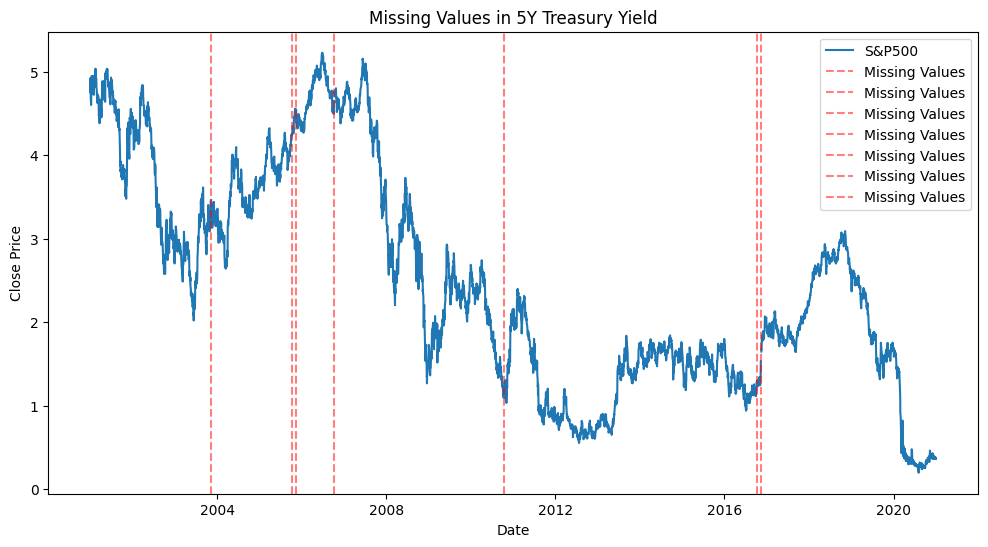

In [9]:

import matplotlib.pyplot as plt

# Plot the S&P500 data
plt.figure(figsize=(12, 6))
plt.plot(SP500.index, SP500['5Y Treasury Yield'], label='S&P500')

# Find missing values
missing_values = SP500[SP500['5Y Treasury Yield'].isnull()]

# Plot missing values
for date in missing_values.index:
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.5, label='Missing Values')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Missing Values in 5Y Treasury Yield')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [10]:
issues_detected

Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
Trend                 19
MACD_dif              17
MACD_dem              17
MACD_histogram        17
ROC                    5
StoK                   8
StoD                   8
CCI                   13
RSI                   14
VMA                   19
pctChange              1
13W Treasury Yield     7
5Y Treasury Yield      7
10Y Treasury Yield     7
30Y Treasury Yield     7
upperband             19
middleband            19
lowerband             19
ATR                   14
OBV                    0
Parabolic SAR          1
MOM                   10
Williams %R           13
Chaikin MF            19
dtype: int64

In [11]:
start_time = time.time()

In [12]:
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os

# TODO: 調整變數名稱，將常數以大寫表示
class EarlyStopper:
    def __init__(self, patience=int(3), min_delta=float(0.01)):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, feature, type='loss'):
        """
        Checks if early stopping criteria is met.

        Args:
            validation_loss (float): The validation loss.

        Returns:
            bool: True if early stopping criteria is met, False otherwise.
        """
        if type == 'loss':
            if feature < self.min_validation_loss:
                self.min_validation_loss = feature
                self.counter = 0
            elif feature > (self.min_validation_loss + self.min_delta):
                self.counter += 1
                if self.counter >= self.patience:
                    return True
            return False
        elif type == 'accuracy':
            if feature > self.min_validation_loss:
                self.min_validation_loss = feature
                self.counter = 0
            elif feature < (self.min_validation_loss - self.min_delta):
                self.counter += 1
                if self.counter >= self.patience:
                    return True
            return False
    
class ModelBase(object):
    def _train_model(self):
        """
        Trains the model.

        Raises:
            NotImplementedError: Subclasses should implement this method.
        """
        raise NotImplementedError("Subclasses should implement this method.")

    def _infer_model(self):
        """
        Infers the model.

        Raises:
            NotImplementedError: Subclasses should implement this method.
        """
        raise NotImplementedError("Subclasses should implement this method.")

    def _online_training_model(self):
        """
        Performs online training of the model.

        Raises:
            NotImplementedError: Subclasses should implement this method.
        """
        raise NotImplementedError("Subclasses should implement this method.")

class NeuralNetworkModelBase(ModelBase):
    def __init__(self, params):
        """
        Initializes the ModelPyTorch class.

        Args:
            params (dict): A dictionary containing the parameters for the model.
        """
        self.params = params

    def _train_model(self, model, X_train, y_train, X_val, y_val, apply_weight):
        """
        Trains the model.
        """
        if apply_weight == 'True':
            train_weights = self.apply_weights(y_train)
            val_weights = self.apply_weights(y_val)
            # TODO: add function to change loss_function
            train_loss_function = nn.BCELoss(weight=train_weights)
            val_loss_function = nn.BCELoss(weight=val_weights)
        else:  
            train_loss_function = nn.BCELoss()
            val_loss_function = nn.BCELoss()
            
        # TODO: add function to change optimizer
        optimizer = torch.optim.Adam(model.parameters(), lr=self.params['learning_rate'])
        early_stopper = EarlyStopper(patience=self.params['patience'], min_delta=self.params['min_delta']) 

        train_losses = []
        train_accuracy = []
        val_losses = []
        val_accuracy = []

        num_epochs = self.params['training_epoch_num']
        for epoch in tqdm(range(num_epochs)):
            model.train()
            optimizer.zero_grad()

            # forward pass
            outputs = model(X_train)
            loss = train_loss_function(outputs, y_train)
            # backward pass and update weights
            loss.backward()
            optimizer.step()

            # calculate training accuracy
            _, predicted = torch.max(outputs.data, -1)
            correct = (predicted == y_train.argmax(dim=-1)).sum().item()
            accuracy = correct / (y_train.size(-3)*y_train.size(-2))
            train_losses.append(loss.item())
            train_accuracy.append(accuracy)

            # calculate validation loss
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val)
                val_loss = val_loss_function(val_outputs, y_val)
                _, val_predicted = torch.max(val_outputs.data, -1)
                val_correct = (val_predicted == y_val.argmax(dim=-1)).sum().item()
                accuracy = val_correct / (y_val.size(-3)*y_val.size(-2))
                val_losses.append(val_loss.item())
                val_accuracy.append(accuracy)

            # early stopping based on training loss
            if early_stopper.early_stop(val_loss.item(), type='loss'):             
                break

        history = {
            'loss': train_losses,
            'binary_accuracy': train_accuracy,
            'val_loss': val_losses,
            'val_binary_accuracy': val_accuracy
        }
        return history, model

    def _infer_model(self, model, X_test):
        """
        Infers the model.

        Args:
            model: The PyTorch model.
            X_test: The input test data.

        Returns:
            The predicted values.
        """
        y_pred = model(X_test)
        return y_pred

    def _online_train_model(self, model, X_train, y_train, single_X_test, 
                        single_y_test, apply_weight, data_update_mode='append'):
        # Update the training dataset with the new instance
        if data_update_mode == 'append':
            online_X_train = torch.cat((X_train, single_X_test), dim=0)
            online_y_train = torch.cat((y_train, single_y_test), dim=0)
        elif data_update_mode == 'replace':
            online_X_train = torch.cat((X_train[1:], single_X_test), dim=0)
            online_y_train = torch.cat((y_train[1:], single_y_test), dim=0)
        elif data_update_mode == 'newest':
            online_X_train = single_X_test
            online_y_train = single_y_test
        else:
            raise ValueError(f"Invalid data update mode: {data_update_mode}")

        # Add the instance and its actual result to the training dataset
        X_train = np.append(X_train, single_X_test, axis=0)
        y_train = np.append(y_train, single_y_test, axis=0)
        
        y_train = torch.tensor(y_train, dtype=torch.float32)
        
        if apply_weight == 'True':
            online_train_weights = self.apply_weights(y_train)
            loss_function = nn.BCELoss(weight=online_train_weights)
        else:
            loss_function = nn.BCELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=self.params['online_train_learning_rate'])
        num_epochs = 10
        history = {}
        for epoch in range(num_epochs):
            # Retrain the model on this updated dataset
            model.train()
            optimizer.zero_grad()

            # forward pass
            outputs = model(online_X_train)
            loss = loss_function(outputs, online_y_train)
            _, predicted = torch.max(outputs.data, -1)
            correct = (predicted == online_y_train.argmax(dim=-1)).sum().item()
            accuracy = correct / online_y_train.size(-2)
            # backward pass and update weights
            loss.backward()
            optimizer.step()
        history = {
            'loss': loss.item() / online_y_train.size(-2),
            'binary_accuracy': accuracy
            }
        return history, model
    
    def apply_weights(self, y_train: torch.tensor, weight_before=1, weight_after=2):
        weights = torch.zeros_like(y_train)
        for idx, sub_y_train in enumerate(y_train):
            array = sub_y_train.numpy()
            sub_weights = [weight_before] * len(array)
            for i in range(1, len(array)):
                if not (array[i] == array[i-1]).all():
                    sub_weights[i:] = [weight_after] * (len(array) - i)
                    break
            for j in range(len(sub_weights)):
                weights[idx, j] = torch.tensor([sub_weights[j]] * y_train.shape[2])
        return weights
       
import torch
import torch.nn as nn
import numpy as np
from collections import Counter

class DummyClassifierModelBase(ModelBase):
    def __init__(self, params, input_shape):
        super(DummyClassifierModelBase, self).__init__()
        self.params = params
        
    def _train_model(self, model, X_train, y_train, X_val, y_val, apply_weight):
        """
        在训练过程中确定最常见的类别。
        """
        # 假设y_train是一个一维的标签数组
        label_counts = Counter(y_train)
        self.most_common_label = label_counts.most_common(1)[0][0]

        # 由于这是一个DummyClassifier，实际上我们不进行任何训练
        # 直接返回模拟的训练历史
        history = {
            'loss': [],
            'binary_accuracy': [],
            'val_loss': [],
            'val_binary_accuracy': []
        }
        return history, model

    def _infer_model(self, model, X_test):
        """
        生成随机预测结果。
        """
        batch_size = X_test.size(0)
        # 对于二分类问题，随机生成0或1
        predictions = torch.randint(0, 2, (batch_size, self.params['predict_steps'], 2), dtype=torch.float32)
        return predictions

    def _online_train_model(self, model, X_train, y_train, single_X_test, 
                        single_y_test, apply_weight, data_update_mode='append'):
        history = {
            'loss': [],
            'binary_accuracy': []
            }
        return history, model
 
class ModelLeNet(nn.Module, NeuralNetworkModelBase):
    def __init__(self, params=dict(), input_shape=tuple()):
        super(ModelLeNet, self).__init__()
        self.params = params

        # Convolution layers
        self.conv1 = nn.Conv1d(input_shape[1],
                               self.params["model_params"]["LeNet"]["conv_1_out_channels"],
                               kernel_size=self.params["model_params"]["LeNet"]["conv_1_kernel"],
                               padding=self.params["model_params"]["LeNet"]["conv_1_padding"])

        # Calculate size after convolutions and pooling
        self._to_linear = None
        self.convs = nn.Sequential(
            self.conv1,
            nn.ReLU(),
            nn.MaxPool1d(self.params["model_params"]["LeNet"]["MaxPool2d_1_kernel_size"]),  # Will reduce each spatial dimension by half
        )
        self._get_conv_output((1, input_shape[1], self.params["look_back"]))

        # Fully connected layer
        self.fc1 = nn.Linear(self._to_linear, self.params["model_params"]["LeNet"]["predict_steps"]*2)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            input = torch.rand(*shape)
            output = self.convs(input)
            self._to_linear = int(torch.flatten(output, 1).shape[1])

    def forward(self, x):
        x = self.convs(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = x.view(-1, 2, self.params["model_params"]["LeNet"]["predict_steps"])  # Reshape to the desired output shape
        return x

class ModelLeNet_2layers(nn.Module, NeuralNetworkModelBase):
    def __init__(self, params=dict(), input_shape=tuple()):
        super(ModelLeNet_2layers, self).__init__()
        self.params = params

        # Convolution layers
        self.conv1 = nn.Conv1d(input_shape[1],
                               self.params["model_params"]["LeNet_2"]["conv_1_out_channels"],
                               kernel_size=self.params["model_params"]["LeNet_2"]["conv_1_kernel"],
                               padding=self.params["model_params"]["LeNet_2"]["conv_1_padding"])
        self.conv2 = nn.Conv1d(self.params["model_params"]["LeNet_2"]["conv_1_out_channels"],
                               self.params["model_params"]["LeNet_2"]["conv_2_out_channels"],
                               kernel_size=self.params["model_params"]["LeNet_2"]["conv_2_kernel"],
                               padding=self.params["model_params"]["LeNet_2"]["conv_2_padding"])

        # Calculate size after convolutions and pooling
        self._to_linear = None
        self.convs = nn.Sequential(
            self.conv1,
            nn.LayerNorm([self.params["model_params"]["LeNet_2"]["conv_1_out_channels"],
                          self.params["look_back"]]),
            nn.ReLU(),
            nn.MaxPool1d(self.params["model_params"]["LeNet_2"]["MaxPool2d_1_kernel_size"]),
            self.conv2,
            nn.LayerNorm([self.params["model_params"]["LeNet_2"]["conv_2_out_channels"],
                          int(self.params["look_back"]/self.params["model_params"]["LeNet_2"]["MaxPool2d_2_kernel_size"])]),
            nn.ReLU(),
            nn.MaxPool1d(self.params["model_params"]["LeNet_2"]["MaxPool2d_2_kernel_size"])
        )
        self._get_conv_output((1, input_shape[1], self.params["look_back"]))

        # Fully connected layers
        self.fc1 = nn.Linear(self._to_linear, self.params["model_params"]["LeNet_2"]["fc_1_out_features"])
        self.ln1 = nn.LayerNorm(self.params["model_params"]["LeNet_2"]["fc_1_out_features"])
        self.fc2 = nn.Linear(self.params["model_params"]["LeNet_2"]["fc_1_out_features"],
                             self.params["model_params"]["LeNet_2"]["predict_steps"] * 2)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            input = torch.rand(*shape)
            output = self.convs(input)
            self._to_linear = int(torch.flatten(output, 1).shape[1])

    def forward(self, x):
        x = self.convs(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.ln1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = x.view(-1, 2, self.params["model_params"]["LeNet_2"]["predict_steps"])  # Reshape to the desired output shape
        return x

class ModelRNN(nn.Module, NeuralNetworkModelBase):
    def __init__(self, params=dict(), input_shape=tuple()):
        super(ModelRNN, self).__init__()
        self.params = params
        self.rnn = nn.RNN(input_size=input_shape[-1],
                          hidden_size=self.params["model_params"]["RNN"]["hidden_size"],
                          num_layers=self.params["model_params"]["RNN"]["num_layers"],
                          dropout=self.params["model_params"]["RNN"]["dropout"],
                          batch_first=True)
        self.lc = nn.LayerNorm([self.params["look_back"], self.params["model_params"]["RNN"]["hidden_size"]])
        self.fc = nn.Linear(self.params["model_params"]["RNN"]["hidden_size"], 2)

    def forward(self, x):
        # Forward pass through RNN
        batch_size = x.size(0)
        hidden = self.init_hidden(batch_size)
        output, hidden = self.rnn(x, hidden)
        output = self.lc(output)
        # Reshape output to fit the fully connected layer
        output = output.contiguous().view(-1, self.params["model_params"]["RNN"]["hidden_size"])
        output = self.fc(output)
        # Reshape back to sequence format and align with target sequence length
        output = output.view(batch_size, -1, 2)  # [batch_size, sequence_length, output_size]
        output = torch.sigmoid(output)
        output = output[:, -self.params["predict_steps"]:, :]  # Take the last 'predict_steps' outputs
        return output

    def init_hidden(self, batch_size):
        # Initialize the hidden state
        return torch.zeros(self.params["model_params"]["RNN"]["num_layers"], batch_size, self.params["model_params"]["RNN"]["hidden_size"])

class ModelLSTM(nn.Module, NeuralNetworkModelBase):
    def __init__(self, params=dict(), input_shape=tuple()):
        super(ModelLSTM, self).__init__()
        self.params = params
        self.lstm = nn.LSTM(input_size=input_shape[-1],
                            hidden_size=self.params["model_params"]["LSTM"]["hidden_size"],
                            num_layers=self.params["model_params"]["LSTM"]["num_layers"],
                            dropout=self.params["model_params"]["LSTM"]["dropout"],
                            batch_first=True)
        self.fc = nn.Linear(self.params["model_params"]["LSTM"]["hidden_size"], 2)

    def forward(self, x):
        # Forward pass through LSTM
        batch_size = x.size(0)
        hidden = self.init_hidden(batch_size)
        output, (hidden, cell) = self.lstm(x, hidden)
        # Reshape output to fit the fully connected layer
        output = output.contiguous().view(-1, self.params["model_params"]["LSTM"]["hidden_size"])
        output = self.fc(output)
        output = torch.sigmoid(output)
        # Reshape back to sequence format and align with target sequence length
        output = output.view(batch_size, -1, 2)  # [batch_size, sequence_length, output_size]
        output = output[:, -self.params["predict_steps"]:, :]  # Take the last 'predict_steps' outputs
        return output

    def init_hidden(self, batch_size):
        # Initialize the hidden state and cell state
        hidden_state = torch.zeros(self.params["model_params"]["LSTM"]["num_layers"], batch_size, self.params["model_params"]["LSTM"]["hidden_size"])
        cell_state = torch.zeros(self.params["model_params"]["LSTM"]["num_layers"], batch_size, self.params["model_params"]["LSTM"]["hidden_size"])
        return (hidden_state, cell_state)

class ModelDNN_5layers(nn.Module, NeuralNetworkModelBase):
    def __init__(self, params, input_shape):
        super(ModelDNN_5layers, self).__init__()
        self.params = params
        # Calculate flattened input size
        input_size = input_shape[1] * input_shape[2]
        self.predict_steps = self.params['predict_steps']
        # Fully connected layers
        self.fc1 = nn.Linear(input_size, self.predict_steps*32)
        self.fc2 = nn.Linear(self.predict_steps*32, self.predict_steps*16)
        self.fc3 = nn.Linear(self.predict_steps*16, self.predict_steps*8)
        self.fc4 = nn.Linear(self.predict_steps*8, self.predict_steps*4)
        self.fc5 = nn.Linear(self.predict_steps*4, self.predict_steps*2)
        # Layer normalization layers
        self.ln1 = nn.LayerNorm(self.predict_steps*32)
        self.ln2 = nn.LayerNorm(self.predict_steps*16)
        self.ln3 = nn.LayerNorm(self.predict_steps*8)
        self.ln4 = nn.LayerNorm(self.predict_steps*4)
        self.ln5 = nn.LayerNorm(self.predict_steps*2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Flatten the input
        x = x.view(x.size(0), -1)  # Flatten to [batch_size, input_size]
        # Fully connected layers with ReLU activations, layer normalization, and dropout
        x = F.relu(self.ln1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.ln2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.ln3(self.fc3(x)))
        x = self.dropout(x)
        x = F.relu(self.ln4(self.fc4(x)))
        x = self.dropout(x)
        x = self.ln5(self.fc5(x))  # Last layer with LayerNorm but without ReLU
        # Apply sigmoid to the final layer
        x = torch.sigmoid(x)
        # Reshape the output to match target shape
        output = x.view(-1, self.predict_steps, 2)  # Reshape to [batch_size, 2, 8]

        return output

class DummyClassifier(nn.Module, DummyClassifierModelBase):
    def __init__(self, params, input_shape):
        super(DummyClassifier, self).__init__()
        self.params = params
        self.predict_steps = self.params['predict_steps']

    def forward(self, x):
        # 獲取批次大小
        batch_size = x.size(0)
        # 隨機生成輸出，這裡假設輸出類別數為2，調整為需要的任何數量
        # 使用 torch.rand 生成介於 [0, 1) 的隨機數據，模擬隨機預測的結果
        random_output = torch.rand(batch_size, self.predict_steps, 2)
        return random_output


class ModelCNN_LSTM(nn.Module, NeuralNetworkModelBase):
    def __init__(self, params, input_shape):
        super(ModelCNN_LSTM, self).__init__()
        self.params = params
        # Convolution layers
        self.conv1 = nn.Conv1d(input_shape[1],
                        self.params["model_params"]["CNN_LSTM"]["conv_1_out_channels"],
                        kernel_size=self.params["model_params"]["CNN_LSTM"]["conv_1_kernel"],
                        padding=self.params["model_params"]["CNN_LSTM"]["conv_1_padding"])
        self.conv2 = nn.Conv1d(self.params["model_params"]["CNN_LSTM"]["conv_1_out_channels"],
                        self.params["model_params"]["CNN_LSTM"]["conv_2_out_channels"],
                        kernel_size=self.params["model_params"]["CNN_LSTM"]["conv_2_kernel"],
                        padding=self.params["model_params"]["CNN_LSTM"]["conv_2_padding"])

        # Calculate size after convolutions and pooling
        self._to_linear = None
        self.convs = nn.Sequential(
            self.conv1,
            nn.LayerNorm([self.params["model_params"]["CNN_LSTM"]["conv_1_out_channels"],
                          self.params["look_back"]]),
            nn.ReLU(),
            nn.MaxPool1d(self.params["model_params"]["CNN_LSTM"]["MaxPool2d_1_kernel_size"]),
            self.conv2,
            nn.LayerNorm([self.params["model_params"]["CNN_LSTM"]["conv_2_out_channels"],
                          int(self.params["look_back"]/self.params["model_params"]["CNN_LSTM"]["MaxPool2d_2_kernel_size"])]),
            nn.ReLU(),
            nn.MaxPool1d(self.params["model_params"]["CNN_LSTM"]["MaxPool2d_2_kernel_size"])
        )
        self._get_conv_output((1, input_shape[1], self.params["look_back"]))
        
        self.lstm = nn.LSTM(input_size=self.params["predict_steps"],
                    hidden_size=self.params["look_back"],
                    num_layers=1,
                    dropout=0.2,
                    batch_first=True)
        
        # Fully connected layers
        self.fc = nn.Linear(self.params["look_back"], 2)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            input = torch.rand(*shape)
            output = self.convs(input)
            self._to_linear = int(torch.flatten(output, 1).shape[1])
            
    def init_hidden(self, batch_size):
        # Initialize the hidden state and cell state
        hidden_state = torch.zeros(1, batch_size, self.params["look_back"])
        cell_state = torch.zeros(1, batch_size, self.params["look_back"])
        return (hidden_state, cell_state)
    
    def forward(self, x):
        x = x.view(-1, x.shape[-2], x.shape[-1]) 
        x = self.convs(x)
        batch_size = x.size(0)
        hidden = self.init_hidden(batch_size)
        output, (hidden, cell) = self.lstm(x, hidden)
        
        output = output.contiguous().view(-1, self.params["look_back"])
        output = self.fc(output)
        output = torch.sigmoid(output)
        output = output.view(batch_size, 2, self.params["predict_steps"])

        return output
    
class ModelFactory:
    @staticmethod
    def create_model_instance(model_type, params=None, input_shape=None):
        """
        Creates an instance of the specified model type.

        Args:
            model_type (str): The type of the model to create.
            params (dict): A dictionary containing the parameters for the model.
            input_shape (tuple): The shape of the input data.
            keras_model: The Keras model to be converted to PyTorch model.

        Returns:
            An instance of the specified model type.
        """
        models = {
            "LeNet": ModelLeNet,
            "LeNet_2": ModelLeNet_2layers,
            "RNN": ModelRNN,
            "LSTM": ModelLSTM,
            # "DNN_1layer": ModelDNN_1layer,
            # "DNN_3layers": ModelDNN_3layers,
            "DNN_5layers": ModelDNN_5layers,
            # "DNN_7layers": ModelDNN_7layers,
            "CNN_LSTM": ModelCNN_LSTM,
            # "seq2seq": Modelseq2seq,
            # "cnn": ModelCNN,
            # "fft": ModelFFT,
            # "ma": ModelMA,
            "DummyClassifier": DummyClassifier
            # Add other models here as needed
        }
        model_instance = models.get(model_type)
        if model_instance is None:
            raise ValueError(f"Invalid model type: {model_type}")
        instance = model_instance(params, input_shape)
        return instance

class Model:
    """A class representing a model for training and inference."""
    def __init__(self, params):
        """
        Initializes the ModelPyTorch class.

        Args:
            params (dict): A dictionary containing the parameters for the model.
        """
        self.params = params
        
    def create_model(self, model_type, input_shape=None):
        """Create a model instance.

        Args:
            model_type (str): The type of the model.
            params (dict, optional): The parameters for the model. Defaults to None.
            input_shape (tuple, optional): The shape of the input data. Defaults to None.

        Returns:
            model_instance: The created model instance.
        """
        model_instance = ModelFactory.create_model_instance(
            model_type, self.params, input_shape)
        return model_instance

    def train_model(self, model, X_train, y_train, X_val, y_val, apply_weight):
        """Train the model.

        Args:
            model: The model instance.
            X_train: The training input data.
            y_train: The training target data.

        Returns:
            The trained model.
        """
        return model._train_model(model, X_train, y_train, X_val, y_val, apply_weight)

    def infer_model(self, model, X_test):
        """Perform inference using the model.

        Args:
            model: The model instance.
            X_test: The input data for inference.

        Returns:
            The predicted output.
        """
        return model._infer_model(model, X_test)

    def online_train_model(self, model, X_train, y_train, single_X_test, 
                        single_y_test, apply_weight, data_update_mode):
        """Perform online training on the model.

        Args:
            model: The model instance.
            X_train: The training input data.
            y_train: The training target data.
            single_X_test: The input data for online training.
            single_y_test: The target data for online training.

        Returns:
            The updated model.
        """
        return model._online_train_model(model, X_train, y_train, single_X_test, 
                        single_y_test, apply_weight, data_update_mode)

    def run(self, X_train, y_train, X_test, y_test, X_val, y_val, save_path_root, pre_trained_model_path=None):
        """Run the model.

        Args:
            model_type (str): The type of the model.
            look_back (int): The number of previous time steps to consider.
            params (dict): The parameters for the model.
            X_train: The training input data.
            y_train: The training target data.
            X_test: The test input data.
            y_test: The test target data.
            pre_trained_model_path (str, optional): The path to a pre-trained model. Defaults to None.

        Returns:
            tuple: A tuple containing the trained model, training history, predicted outputs, 
            online training losses, and online training accuracy.
        """
        if pre_trained_model_path is not None:
            # model = torch.load(pre_trained_model_path)
            input_shape = X_train.shape
            model = self.create_model(self.params['model_type'], input_shape)
            model.load_state_dict(torch.load(pre_trained_model_path))
            history = None
        else:
            input_shape = X_train.shape
            model = self.create_model(self.params['model_type'], input_shape)
            history, model = self.train_model(model, X_train, y_train, X_val, y_val, self.params['apply_weight'])
            # torch.save(model, self.params['trained_model_path'])
            torch.save(model.state_dict(), os.path.join(save_path_root, self.params['trained_model_path']))
        online_training_losses = []
        online_training_acc = []
        y_preds = []
        
        for i in tqdm(range(len(X_test)), file=open("log.txt", "a")):
            y_pred = self.infer_model(model, X_test[i:i+1])
            y_preds.append(y_pred[0])

            online_history, model = self.online_train_model(
                model, X_train, y_train, X_test[i:i+1], y_test[i:i+1], self.params['apply_weight'], self.params['data_update_mode'])
            online_training_losses.append(online_history['loss'])
            online_training_acc.append(
                online_history['binary_accuracy'])
        torch.save(model, os.path.join(save_path_root, self.params['online_trained_model_path']))
        y_preds = torch.stack(y_preds).detach().numpy()

        return model, history, y_preds, online_training_losses, online_training_acc


In [13]:
model_wrapper = Model(params=params)
model, history, y_preds, online_training_losses, online_training_acc = \
    model_wrapper.run(X_train, y_train, X_test, y_test, X_val, y_val, current_dir)


  8%|▊         | 83/1000 [00:01<00:11, 80.65it/s]


In [14]:
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


Execution time: 32.79978346824646 seconds


In [15]:
y_preds = torch.tensor(y_preds, dtype=torch.float32)
y_preds = preprocessor.change_values_after_first_reverse_point(y_preds)


In [16]:
params['filter'] = False

In [17]:
y_preds.shape, y_test.shape

(torch.Size([184, 8, 2]), torch.Size([184, 8, 2]))

In [110]:
# postprocessor = Postprocesser()
# X_train, X_test, X_newest, y_train, y_test, y_preds = \
#     postprocessor.check_shape(X_train, X_test, X_newest, y_train, y_test, y_preds, reshape=params['model_params'][params['model_type']]['reshape'])
test_trade_signals = postprocessor.process_signals(y_test, test_dates, False)
pred_trade_signals = postprocessor.process_signals(y_preds, test_dates, params['filter'])


In [111]:
def get_signals(row_trade_signals, history_data):
    history_data['Date'] = history_data.index
    row_trade_signals['Signal'] = row_trade_signals['Signal'].replace('Sell (first)', 'Sell')
    row_trade_signals['Signal'] = row_trade_signals['Signal'].replace('Buy (last)', 'Buy')
    row_trade_signals.index = pd.to_datetime(row_trade_signals['Date'])
    for i in row_trade_signals.index:
        if row_trade_signals['Signal'][i] == 'Buy':
            row_trade_signals.loc[i, 'Buy'] = history_data['Close'][i]
        elif row_trade_signals['Signal'][i] == 'Sell':
            row_trade_signals.loc[i, 'Sell'] = history_data['Close'][i]
    buy_signals = row_trade_signals.dropna(subset=['Buy'])
    sell_signals = row_trade_signals.dropna(subset=['Sell'])
    buy_signals['Date'] = pd.to_datetime(buy_signals.index)
    buy_signals['Date'] = buy_signals['Date'].apply(lambda x: int(x.timestamp() * 1000))
    buy_signals = buy_signals[['Date', 'Buy']].values.tolist()
    sell_signals['Date'] = pd.to_datetime(sell_signals['Date'])
    sell_signals['Date'] = sell_signals['Date'].apply(lambda x: int(x.timestamp() * 1000))
    sell_signals = sell_signals[['Date', 'Sell']].values.tolist()
    return buy_signals, sell_signals

In [108]:
test_trade_signals

,Date,Signal
0,2015-03-02,
1,2015-03-03,
2,2015-03-04,
3,2015-03-05,
4,2015-03-06,
...,...,...
1467,2020-12-24,
1468,2020-12-28,
1469,2020-12-29,
1470,2020-12-30,


In [112]:
history_data = yf.download('^GSPC', start='2001-01-01', end='2021-01-01') 
test_buy_signals, test_sell_signals = get_signals(test_trade_signals, history_data)
pred_buy_signals, pred_sell_signals = get_signals(pred_trade_signals, history_data)

,Date,Signal,Sell,Buy
Date,,,,
2015-04-07,2015-04-07,Buy,NaN,2076.330078
2015-07-10,2015-07-10,Buy,NaN,2076.620117
2015-07-29,2015-07-29,Buy,NaN,2108.570068
2015-10-01,2015-10-01,Buy,NaN,1923.819946
2016-02-12,2016-02-12,Buy,NaN,1864.780029
2016-05-25,2016-05-25,Buy,NaN,2090.540039
2016-07-07,2016-07-07,Buy,NaN,2097.899902
2016-10-06,2016-10-06,Buy,NaN,2160.770020
2016-11-07,2016-11-07,Buy,NaN,2131.520020


C:\Users\e4903\AppData\Local\Temp\ipykernel_24280\807856258.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_signals['Date'] = pd.to_datetime(buy_signals.index)
C:\Users\e4903\AppData\Local\Temp\ipykernel_24280\807856258.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_signals['Date'] = buy_signals['Date'].apply(lambda x: int(x.timestamp() * 1000))
C:\Users\e4903\AppData\Local\Temp\ipykernel_24280\807856258.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,Date,Signal,Sell,Buy
Date,,,,
2015-04-16,2015-04-16,Buy,NaN,2104.989990
2015-07-17,2015-07-17,Buy,NaN,2126.639893
2015-10-06,2015-10-06,Buy,NaN,1979.920044
2015-12-14,2015-12-14,Buy,NaN,2021.939941
2016-02-24,2016-02-24,Buy,NaN,1929.800049
2016-04-21,2016-04-21,Buy,NaN,2091.479980
2016-06-07,2016-06-07,Buy,NaN,2112.129883
2016-07-12,2016-07-12,Buy,NaN,2152.139893
2016-10-11,2016-10-11,Buy,NaN,2136.729980


C:\Users\e4903\AppData\Local\Temp\ipykernel_24280\807856258.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_signals['Date'] = pd.to_datetime(buy_signals.index)
C:\Users\e4903\AppData\Local\Temp\ipykernel_24280\807856258.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_signals['Date'] = buy_signals['Date'].apply(lambda x: int(x.timestamp() * 1000))
C:\Users\e4903\AppData\Local\Temp\ipykernel_24280\807856258.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [59]:
test_trade_signals['Signal'] = test_trade_signals['Signal'].replace('Sell (first)', 'Sell')
pred_trade_signals['Signal'] = pred_trade_signals['Signal'].replace('Sell (first)', 'Sell')
# test_trade_signals['Signal'] = test_trade_signals['Signal'].replace('Sell', 'S')
test_trade_signals['Signal'] = test_trade_signals['Signal'].replace('Buy (last)', 'Buy')
pred_trade_signals['Signal'] = pred_trade_signals['Signal'].replace('Buy (last)', 'Buy')
# test_trade_signals['Signal'] = test_trade_signals['Signal'].replace('Buy', 'B')


In [60]:
test_trade_signals['Signal'].value_counts()

        1424
Sell      24
Buy       24
Name: Signal, dtype: int64

In [56]:
test_trade_signals.to_csv('test_trade_signals.csv')
pred_trade_signals.to_csv('pred_trade_signals.csv')

In [20]:
test_trade_signals.to_json('test_trade_signals.json')

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import confusion_matrix
import seaborn as sns
import backtrader as bt
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from io import StringIO
import sys
import os
import json
from sklearn.metrics import roc_curve, precision_recall_curve, auc

class Evaluator:
    def __init__(self, params):
        self.params = params
        pass

    def confusion_matrix(self, y_preds, y_test):
        # Flatten the 3D tensors for evaluation
        y_test_flat = np.argmax(y_test.reshape(-1, y_test.shape[-1]), axis=1)
        y_preds_flat = np.argmax(
            y_preds.reshape(-1, y_preds.shape[-1]), axis=1)

        # Calculate evaluation metrics
        precision = precision_score(y_test_flat, y_preds_flat, average='macro')
        recall = recall_score(y_test_flat, y_preds_flat, average='macro')
        accuracy = accuracy_score(y_test_flat, y_preds_flat)
        f1 = f1_score(y_test_flat, y_preds_flat, average='macro')

        return precision, recall, accuracy, f1

    def plot_confusion_matrix(self, y_test, y_preds, save_path='plots/confusion_matrix.png'):
        # Convert to class labels if necessary
        y_test = np.argmax(y_test.reshape(-1, y_test.shape[-1]), axis=1)
        y_preds = np.argmax(y_preds.reshape(-1, y_preds.shape[-1]), axis=1)

        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_preds)
        sns.heatmap(cm, annot=True, fmt='d')
        plt.title('Confusion Matrix')

        # Calculate metrics
        precision = precision_score(y_test, y_preds, average='macro')
        recall = recall_score(y_test, y_preds, average='macro')
        accuracy = accuracy_score(y_test, y_preds)
        f1 = f1_score(y_test, y_preds, average='macro')

        # Annotate metrics on the plot
        plt.xlabel(
            f'Predicted\n\nAccuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nPrecision: {precision:.2f}')
        plt.ylabel(f'Actual\n\nRecall: {recall:.2f}')
        plt.savefig(save_path)
        plt.close()
        # plt.show()
        confusion_matrix_text = \
            f'''\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}\n
        '''
        confusion_matrix_info = pd.DataFrame({'Accuracy': [accuracy], 'Precision': [
                                             precision], 'Recall': [recall], 'F1 Score': [f1]})
        return save_path, confusion_matrix_text, confusion_matrix_info

    def plot_training_curve(self, history, save_path='plots/training_curve.png'):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Plot loss and validation loss
        ax1.plot(history['loss'], label='Loss')
        ax1.plot(history['val_loss'], label='Validation Loss')
        ax1.set_title('Training Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.grid(True)
        ax1.legend()

        # Plot accuracy and validation accuracy
        ax2.plot(history['binary_accuracy'], label='Accuracy')
        ax2.plot(history['val_binary_accuracy'], label='Validation Accuracy')
        ax2.set_title('Training Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.grid(True)
        ax2.legend()
        plt.tight_layout()
        plt.savefig(save_path)
        plt.close()
        # plt.show()

        return save_path

    def plot_online_training_curve(self, acc, losses, save_path='plots/online_training_curve.png'):
        # Create a figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Plot loss on the second subplot
        ax1.plot(losses, color='tab:blue')
        ax1.set_title('Online Training Loss')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Loss')
        ax1.grid(True)

        # Plot accuracy on the first subplot
        ax2.plot(acc, color='tab:red')
        ax2.set_title('Online Training Accuracy')
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Accuracy')
        ax2.grid(True)

        # Adjust the layout
        plt.tight_layout()
        plt.savefig(save_path)
        plt.close()
        # plt.show()

        return save_path

    def remove_short_sequences(self, arr, x):
        """
        Remove sequences in the array that are shorter than x, considering both 0 to 1 and 1 to 0 changes.

        :param arr: The input array
        :param x: The minimum sequence length to keep
        :return: The modified array
        """
        # Identify the changes in the array
        change_indices = np.where(np.diff(arr) != 0)[0] + 1
        # Include the start and end of the array
        change_indices = np.insert(change_indices, 0, 0)
        change_indices = np.append(change_indices, len(arr))

        for i in range(len(change_indices) - 1):
            # Calculate the length of the sequence
            seq_length = change_indices[i+1] - change_indices[i]
            if seq_length < x:
                # Set the values of short sequences to the value preceding the sequence
                arr[change_indices[i]:change_indices[i+1]
                    ] = arr[change_indices[i] - 1]
        return arr

    def plot_predictions(self, y_test, y_preds, filter, save_path='plots/predictions.png'):
        # Convert one-hot encoded arrays to integer labels
        y_test_labels = np.argmax(y_test, axis=-1).flatten()
        y_preds_labels = np.argmax(y_preds, axis=-1).flatten()
        if filter != 'False':
            y_preds_labels = self.remove_short_sequences(
                y_preds_labels.clone(), filter)
        plt.figure(figsize=(32, 6))
        # Plotting y_test
        plt.plot(y_test_labels, label='y_test')

        # Plotting y_preds
        plt.plot(y_preds_labels, label='y_preds')

        # Adding labels and legend
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.legend(fontsize=20)
        plt.savefig(save_path)
        # Display the plot
        plt.close()
        # plt.show()
        return save_path

    def plot_trading_signals(self, data, trade_signals, x_start=0, x_stop=-1, save_path='plots/trading_details_kbar.png'):
        stock_data = data[['Open', 'High', 'Low', 'Close']
                          ].loc[data.index.isin(trade_signals['Date'])]
        stock_data['pred_signal'] = trade_signals['Signal'].values

        fig, ax = plt.subplots(figsize=(32, 6))
        for i in stock_data['pred_signal'].index[x_start:x_stop]:
            self._kbar(stock_data['Open'].loc[i], stock_data['Close'].loc[i],
                       stock_data['High'].loc[i], stock_data['Low'].loc[i], i, ax)

        self._plot_signals(trade_signals, stock_data, x_start, x_stop, ax)
        ax.set_title(
            f'Trading Details, from {stock_data.index[x_start].date()} to {stock_data.index[x_stop].date()}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.set_xticks(stock_data.index[x_start:x_stop])
        # ax.set_xticklabels(stock_data.index[x_start:x_stop].strftime('%Y-%m-%d'), rotation=30, ha='right', fontsize=6)
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('right')
            label.set_fontsize(6)
        plt.grid()
        plt.legend()
        plt.savefig(save_path)
        plt.close()
        # plt.show()

        return save_path

    def _kbar(self, open, close, high, low, pos, ax):  # for US stocks
        if close > open:
            color = 'green'   # rise
            height = close - open
            bottom = open
        else:
            color = 'red'     # fall
            height = open - close
            bottom = close
        ax.bar(pos, height=height, bottom=bottom, width=0.6, color=color)
        ax.vlines(pos, high, low, color=color)

    def _plot_signals(self, trade_signals, stock_data, x_start, x_stop, ax):
        buy_signals = trade_signals.loc[x_start:x_stop][(
            trade_signals['Signal'] == 'Buy') | (trade_signals['Signal'] == 'Buy (first)')]
        for i in buy_signals['Date']:
            if i in stock_data.index:
                ax.scatter(i, stock_data.loc[i, 'Low'] -
                           50, marker='^', color='green', s=100)

        sell_signals = trade_signals.loc[x_start:x_stop][(
            trade_signals['Signal'] == 'Sell') | (trade_signals['Signal'] == 'Sell (first)')]
        for i in sell_signals['Date']:
            if i in stock_data.index:
                ax.scatter(
                    i, stock_data.loc[i, 'High'] + 50, marker='v', color='red', s=100)

    def find_closest_date(self, pred_trade_signals, test_trade_signals):
        # Filtering and processing signals
        pred_df_filtered = pred_trade_signals[pred_trade_signals['Signal'].notna() & (
            pred_trade_signals['Signal'] != '')]
        test_df_filtered = test_trade_signals[test_trade_signals['Signal'].notna() & (
            test_trade_signals['Signal'] != '')]

        for index in pred_df_filtered.index:
            if '(first)' in pred_df_filtered['Signal'].loc[index] or '(last)' in pred_df_filtered['Signal'].loc[index]:
                pred_df_filtered.loc[index, 'Signal'] = pred_df_filtered['Signal'].loc[index].split()[
                    0]
        for index in test_df_filtered.index:
            if '(first)' in test_df_filtered['Signal'].loc[index] or '(last)' in test_df_filtered['Signal'].loc[index]:
                test_df_filtered.loc[index, 'Signal'] = test_df_filtered['Signal'].loc[index].split()[
                    0]

        # Creating a new DataFrame to store the results
        pred_days_difference_results = pred_df_filtered.copy()
        pred_days_difference_results['ClosestDateInTest'] = pd.NaT
        pred_days_difference_results['DaysDifference'] = pd.NA

        # Iterating through each row in pred_days_difference_results to find the closest date and days difference
        for index, row in pred_days_difference_results.iterrows():
            signal, pred_date = row['Signal'], row['Date']
            same_signal_df = test_df_filtered[test_df_filtered['Signal'] == signal].copy(
            )

            if not same_signal_df.empty:
                same_signal_df['DateDifference'] = (
                    same_signal_df['Date'] - pred_date)
                closest_date = same_signal_df.loc[same_signal_df['DateDifference'].abs(
                ).idxmin()]
                pred_days_difference_results.at[index,
                                                'ClosestDateInTest'] = closest_date['Date']
                pred_days_difference_results.at[index,
                                                'DaysDifference'] = closest_date['DateDifference'].days

        return pred_days_difference_results

    def _plot_days_difference_bar_chart(self, pred_days_difference_results, save_path='plots/pred_days_difference_bar_chart.png'):
        # Create bar plot
        plt.figure(figsize=(14, 6))
        plt.bar(range(len(pred_days_difference_results)),
                pred_days_difference_results['DaysDifference'], color='blue', alpha=0.7)
        plt.title('Bar plot of pred_days_difference_results')
        plt.xlabel('Index')
        plt.ylabel('Difference Value')
        plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
        plt.savefig(save_path)
        plt.close()
        # plt.show()
        return save_path

    def plot_roc_pr_curve(self, y_test, y_preds, save_path='plots/roc_pr_curve.png'):
        # Compute ROC curve
        fpr, tpr, thresholds_roc = roc_curve(y_test.argmax(dim=-1).flatten(), y_preds.argmax(dim=-1).flatten())
        roc_auc = auc(fpr, tpr)
        # Compute Precision-Recall curve
        precision, recall, thresholds_pr = precision_recall_curve(y_test.argmax(dim=-1).flatten(), y_preds.argmax(dim=-1).flatten())
        
        # Create a figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Plot ROC curve
        ax1.plot(fpr, tpr, label='ROC curve')
        ax1.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Add diagonal dashed line
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.set_title(f'Receiver Operating Characteristic (ROC) Curve, AUC={roc_auc:.2f}')
        ax1.legend()

        # Plot Precision-Recall curve
        ax2.plot(recall, precision, label='Precision-Recall curve')
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.set_title('Precision-Recall Curve')
        ax2.legend()
        # Adjust spacing between subplots
        plt.tight_layout()
        # Show the plot
        # plt.show()
        plt.savefig(save_path)
        plt.close()
        
        return roc_auc, save_path

    def perform_backtesting(self, stock_data, trade_signals):
        trade_strategy = self.params['trade_strategy']

        buffer = StringIO()
        sys.stdout = buffer

        # Initialize cerebro engine
        cerebro = bt.Cerebro()
        # Create a data feed from stock data
        data_feed = bt.feeds.PandasData(dataname=stock_data)
        # Add data feed to cerebro
        cerebro.adddata(data_feed)

        # Define and add strategy
        class SignalStrategy(bt.Strategy):
            def __init__(self):
                # Map dates to signals for quick lookup
                self.signal_dict = \
                    dict((pd.Timestamp(date).to_pydatetime().date(), signal)
                         for date, signal in zip(trade_signals['Date'],
                                                 trade_signals['Signal']))

            def log(self, txt, dt=None):
                # Logging function for this strategy
                dt = dt or self.datas[0].datetime.date(0)
                print(f'{dt.isoformat()}, {txt}')

            def next(self):
                # Get the current date
                current_date = self.datas[0].datetime.date(0)
                # Check if there's a signal for this date
                signal = self.signal_dict.get(current_date)
                current_price = self.datas[0].open[0]*1.005

                if trade_strategy == 'single':
                    # Original single share buy/sell logic
                    if signal == 'Buy (first)' or signal == 'Buy (last)':
                        # Buy logic
                        self.buy(size=1)
                        self.log("SINGLE BUY EXECUTED")
                    elif signal == 'Sell (first)' or signal == 'Sell (last)':
                        # Sell logic
                        self.sell(size=1)
                        self.log("SINGLE SELL EXECUTED")
                    elif signal == 'Buy':
                        # Buy logic
                        self.buy(size=2)
                        self.log("DOUBLE BUY EXECUTED")
                    elif signal == 'Sell':
                        # Sell logic
                        self.sell(size=2)
                        self.log("DOUBLE SELL EXECUTED")

                elif trade_strategy == 'all':
                    # Buy/Sell as many shares as possible
                    if signal == 'Buy (first)' or signal == 'Buy (last)':
                        cash = self.broker.getcash()
                        size_to_buy = int(cash / current_price*1.005)  # Only whole shares
                        self.buy(size=size_to_buy)
                        self.log(f"BUY EXECUTED, size_to_buy:{size_to_buy}, signal:{signal}, cash:{self.broker.getcash()}, position:{self.getposition(self.datas[0]).size}")
                    elif signal == 'Sell (first)' or signal == 'Sell (last)':
                        cash = self.broker.getcash()
                        size_to_sell = int(cash / current_price*1.005)
                        self.sell(size=size_to_sell)
                        self.log(f"SELL EXECUTED, size_to_sell:{size_to_sell}, signal:{signal}, cash:{self.broker.getcash()}, position:{self.getposition(self.datas[0]).size}")
                    elif signal == 'Buy':
                        current_position = np.absolute(self.getposition(self.datas[0]).size)
                        cash = self.broker.getcash()
                        if cash > (current_position * current_price*1.005):
                            size_to_buy = np.absolute(current_position)
                            self.buy(size=size_to_buy)
                            self.log(f"BUY EXECUTED, size_to_buy:{size_to_buy}, signal:{signal}, cash:{self.broker.getcash()}, position:{self.getposition(self.datas[0]).size}")
                            cash = self.broker.getcash() - current_position*current_price*1.005
                            size_to_buy = int(cash / current_price*1.005)  # Only whole shares
                            self.buy(size=size_to_buy)
                            self.log(f"BUY EXECUTED, size_to_buy:{size_to_buy}, signal:{signal}, cash:{self.broker.getcash()}, position:{self.getposition(self.datas[0]).size}")
                        else:
                            size_to_buy = int(cash / current_price*1.005)
                            self.buy(size=size_to_buy)
                            self.log(f"BUY EXECUTED, size_to_buy:{size_to_buy}, signal:{signal}, cash:{self.broker.getcash()}, position:{self.getposition(self.datas[0]).size}")
                    elif signal == 'Sell':
                        current_position = np.absolute(self.getposition(self.datas[0]).size)
                        size_to_sell = current_position*2
                        self.sell(size=size_to_sell)
                        self.log(f"SELL EXECUTED, size_to_sell:{size_to_sell}, signal:{signal}, cash:{self.broker.getcash()}, position:{self.getposition(self.datas[0]).size}")

            def notify_order(self, order):
                if order.status in [order.Completed]:
                    cash = self.broker.getcash()
                    value = self.broker.getvalue()
                    if order.isbuy():
                        self.log(
                            f'BUY EXECUTED, Price: {order.executed.price}, Cost: {order.executed.value}, Commission: {order.executed.comm}, Cash: {cash}, Value: {value}')
                    elif order.issell():
                        self.log(
                            f'SELL EXECUTED, Price: {order.executed.price}, Cost: {order.executed.value}, Commission: {order.executed.comm}, Cash: {cash}, Value: {value}')

        # Add strategy to cerebro
        cerebro.addstrategy(SignalStrategy)
        # Set initial cash, commission, etc.
        cerebro.broker.setcash(10000.0)
        cerebro.broker.setcommission(commission=0.005)
        # You can add more code here to analyze the results
        # Add analyzers to cerebro
        cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio')
        cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
        cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='trade_analyzer')
        # Run the backtest
        strategies = cerebro.run()
        backtesting_report = dict()
        # Extracting and displaying results
        strategy = strategies[0]
        backtesting_report['sharpe_ratio'] = strategy.analyzers.sharpe_ratio.get_analysis(
        )
        backtesting_report['drawdown'] = strategy.analyzers.drawdown.get_analysis()
        backtesting_report['trade_analyzer'] = strategy.analyzers.trade_analyzer.get_analysis(
        )
        backtesting_report['final_value'] = cerebro.broker.getvalue()
        backtesting_report['pnl'] = backtesting_report['final_value'] - \
            cerebro.broker.startingcash
        backtesting_report['pnl_pct'] = backtesting_report['pnl'] / \
            cerebro.broker.startingcash * 100.0
        backtesting_report['total_return'] = backtesting_report['final_value'] / \
            cerebro.broker.startingcash

        # Plotting the results
        sys.stdout = sys.__stdout__
        trade_summary = buffer.getvalue()
        buffer.close()
        # img = cerebro.plot(style='candlestick', iplot=False, volume=False, savefig=True)
        # img[0][0].savefig(f'plots/backtesting_kbar.png')
        return strategies, backtesting_report, trade_summary

    def generate_model_summary(self, model):
        # Capture the summary output
        # buffer = StringIO()
        # sys.stdout = buffer
        # summary(model=model, input_size=(1, 19, 32))
        # sys.stdout = sys.__stdout__
        # model_summary = buffer.getvalue()
        # buffer.close()
        total = sum([param.nelement() for param in model.parameters()])
        model_summary = f'{model}, \nNumber of parameter: {total}'
        return model_summary

    # TODO:　fix the plot_trading_signals bugs
    def _compile_and_save_report(self, model_summary, training_report, online_training_report,
                                 confusion_matrix, confusion_matrix_text, confusion_matrix_info,
                                 roc_auc, roc_pr_save_path,
                                 pred_trade_signals_plot_save_path, test_trade_signals_plot_save_path, predictions_save_path, filtered_predictions_save_path,
                                 pred_days_difference_results, pred_days_difference_bar_chart_save_path,
                                 backtesting_report, trade_summary, execution_time, report_save_path='report.html', summary_save_path='summary.txt'):
        # display(model_summary)
        # display(confusion_matrix_text)
        # Compile the report. This can be done using a HTML generator.
        backtesting_report_table = pd.DataFrame()
        backtesting_report_table['sharpe_ratio'] = [
            backtesting_report['sharpe_ratio']['sharperatio']]
        # backtesting_report_table['drawdown'] = [backtesting_report['drawdown']['max']['drawdown']]
        backtesting_report_table['initial_value'] = [10000.0]
        backtesting_report_table['final_value'] = [
            backtesting_report['final_value']]
        backtesting_report_table['total_return'] = [
            backtesting_report['total_return']]
        # display(backtesting_report_table)
        backtesting_report = backtesting_report_table.to_html()
        backtesting_report_text = backtesting_report_table.to_csv()
        pred_days_difference_abs_mean = pred_days_difference_results['DaysDifference'].abs(
        ).mean()
        pred_days_difference_results = pred_days_difference_results.to_html()
        params_text = json.dumps(self.params, indent=4)
        execution_time_text = f"Execution time: {execution_time} seconds"
        roc_auc_text = f'ROC AUC: {roc_auc:.2f}'
        report = f'''
        <html>
            <head>
                <title>Stock Price Prediction Report</title>
            </head>
            <body>
                <h1>Stock Price Prediction Report</h1>
                <h2>Parameters</h2>
                <pre>{params_text}</pre>
                <h2>Model Summary</h2>
                <pre>{model_summary}</pre>
                <h2>Execution time</h2>
                <pre>{execution_time_text}</pre>
                <h2>Training Report</h2>
                <img src="{training_report}" />
                <h2>Online Training Report</h2>
                <img src="{online_training_report}" />
                <h2>Confusion Matrix</h2>
                <pre>{confusion_matrix_text}</pre>
                <img src="{confusion_matrix}" />
                <h2>ROC curve and PR curve</h2>
                <pre>{roc_auc_text}</pre>
                <img src="{roc_pr_save_path}" />
                <h2>Predictions Compared With Actual Signals</h2>
                <img src="{predictions_save_path}" />
                <h2>Filtered Predictions Compared With Actual Signals</h2>
                <img src="{filtered_predictions_save_path}" />
                <h2>Predict Trading Signals Difference Bar chart</h2>
                <img src="{pred_days_difference_bar_chart_save_path}" />
                <h2>Predict Trading Signals Difference Details</h2>
                <pre>Average Difference: {pred_days_difference_abs_mean}</pre>
                <pre>{pred_days_difference_results}</pre>
                <h2>Predict Trading Details</h2>
                <img src="{pred_trade_signals_plot_save_path}" />
                <h2>Actual Trading Details</h2>
                <img src="{test_trade_signals_plot_save_path}" />
                <h2>Trade Summary</h2>
                <pre>{backtesting_report}</pre>
                <h2>Trade Details</h2>
                <pre>{trade_summary}</pre>
            </body>
        </html>
        '''

        # Save the report to a file
        with open(report_save_path, 'w') as file:
            file.write(report)

        summary = {'Accuracy': [confusion_matrix_info['Accuracy'].values[0]],
                    'Precision': [confusion_matrix_info['Precision'].values[0]],
                    'Recall': [confusion_matrix_info['Recall'].values[0]],
                    'F1 Score': [confusion_matrix_info['F1 Score'].values[0]], 
                    'roc_auc': [roc_auc],
                    'execution_time': [execution_time],
                    'pred_days_difference': [pred_days_difference_abs_mean],
                    'sharpe_ratio': [backtesting_report_table['sharpe_ratio'].to_json()],
                    'initial_value': [backtesting_report_table['initial_value'].to_json()],
                    'final_value': [backtesting_report_table['final_value'].to_json()],
                    'total_return': [backtesting_report_table['total_return'].to_json()],
                }

        with open(summary_save_path, 'w') as file:
            json.dump(summary, file)

    def generate_report(self, model, y_test, y_preds, history,
                        online_training_acc, online_training_losses,
                        stock_data, pred_trade_signals, test_trade_signals, execution_time, save_path_root, x_start=0, x_stop=-1):
        model_summary = self.generate_model_summary(model)
        if history:
            training_report = self.plot_training_curve(history, save_path=os.path.join(
                save_path_root, self.params['plot_training_curve_save_path']))
        else:
            training_report = ''

        online_training_report = self.plot_online_training_curve(online_training_acc,
                                                                 online_training_losses, save_path=os.path.join(save_path_root, self.params['online_training_curve_save_path']))
        confusion_matrix, confusion_matrix_text, confusion_matrix_info = self.plot_confusion_matrix(
            y_test, y_preds, save_path=os.path.join(save_path_root, self.params['confusion_matrix_save_path']))
        roc_auc, roc_pr_save_path = self.plot_roc_pr_curve(y_test, y_preds, save_path=os.path.join(save_path_root, self.params['roc_pr_curve_save_path']))
        predictions_save_path = self.plot_predictions(y_test, y_preds, False, save_path=os.path.join(
            save_path_root, self.params['predictions_save_path']))
        filtered_predictions_save_path = self.plot_predictions(y_test, y_preds, filter=self.params['filter'], save_path=os.path.join(
            save_path_root, self.params['filtered_predictions_save_path']))
        pred_trade_signals_plot_save_path = self.plot_trading_signals(stock_data, pred_trade_signals, x_start, x_stop, save_path=os.path.join(
            save_path_root, self.params['pred_trade_signals_plot_save_path']))
        test_trade_signals_plot_save_path = self.plot_trading_signals(stock_data, test_trade_signals, x_start, x_stop, save_path=os.path.join(
            save_path_root, self.params['test_trade_signals_plot_save_path']))
        pred_days_difference_results = self.find_closest_date(
            pred_trade_signals, test_trade_signals)
        pred_days_difference_bar_chart_save_path = self._plot_days_difference_bar_chart(
            pred_days_difference_results, save_path=os.path.join(save_path_root, self.params['pred_days_difference_bar_chart_save_path']))
        backtest_results, backtesting_report, trade_summary = self.perform_backtesting(
            stock_data, pred_trade_signals)
        self._compile_and_save_report(model_summary, training_report, online_training_report, confusion_matrix, confusion_matrix_text, confusion_matrix_info, 
                                      roc_auc, roc_pr_save_path,
                                      pred_trade_signals_plot_save_path, test_trade_signals_plot_save_path, predictions_save_path, filtered_predictions_save_path,
                                      pred_days_difference_results, pred_days_difference_bar_chart_save_path, backtesting_report, trade_summary, execution_time,
                                      report_save_path=os.path.join(save_path_root, self.params['report_save_path']), summary_save_path=os.path.join(save_path_root, self.params['summary_save_path']))


In [22]:
evaluator = Evaluator(params=params)
evaluator.generate_report(model, y_test, y_preds, history, 
                        online_training_acc, online_training_losses,
                        SP500, pred_trade_signals, test_trade_signals, execution_time, current_dir, x_start=0, x_stop=300)

C:\Users\e4903\AppData\Local\Temp\ipykernel_24280\2076433269.py:206: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  buy_signals = trade_signals.loc[x_start:x_stop][(
C:\Users\e4903\AppData\Local\Temp\ipykernel_24280\2076433269.py:213: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sell_signals = trade_signals.loc[x_start:x_stop][(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\e4903\AppData\Local\Temp\ipykernel_24280\2076433269.py:206: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  buy_signals = trade_signals.loc[x_start:x_stop][(
C:\Users\e4903\AppData\Local\Temp\ipykernel_24280\2076433269.py:213: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sell_signals = trade_signals.loc[x_start:x_stop][(
No artists with labels found to put in legend.  Note 

In [23]:
y_test.argmax(dim=-1)

tensor([[0, 0, 0,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

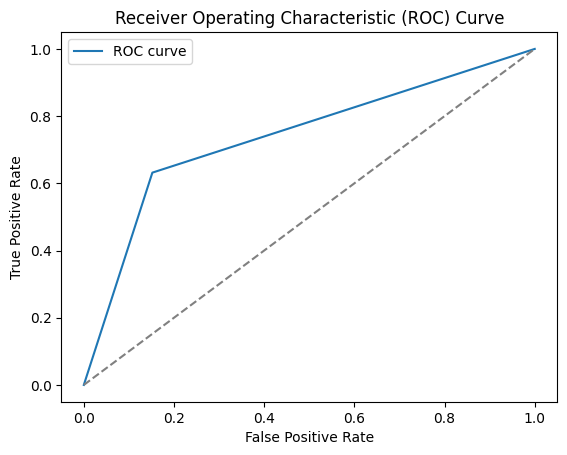

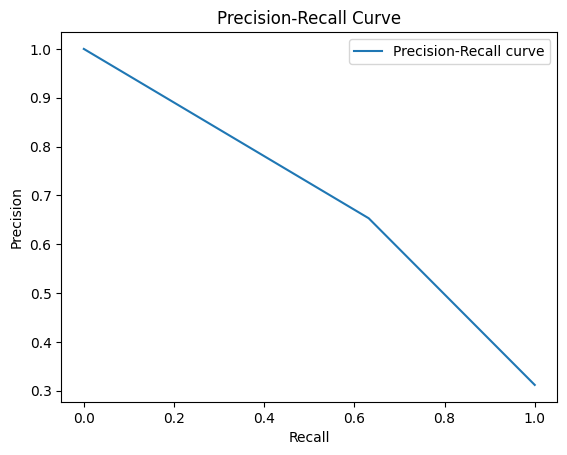

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

# Compute ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test.argmax(dim=-1).flatten(), y_preds.argmax(dim=-1).flatten())

# Compute Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test.argmax(dim=-1).flatten(), y_preds.argmax(dim=-1).flatten())

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Add diagonal dashed line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [25]:
import pickle

# Define the file path
file_path = 'data.pkl'

# Create a dictionary to store the variables
data = {
    'X_train': X_train,
    'X_test': X_test,
    'X_newest': X_newest,
    'y_train': y_train,
    'y_test': y_test,
    'y_preds': y_preds
}

# Save the variables as a file
with open(file_path, 'wb') as file:
    pickle.dump(data, file)
